In [5]:
import numpy as np
np.random.randn(5)

array([-1.74544708,  0.72523622,  0.51548233,  0.39092518,  0.92711162])

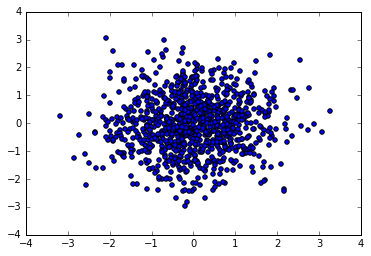

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(np.random.randn(1000), np.random.randn(1000));


http://www.damian.oquanta.info/posts/blogging-with-nikola-and-ipython.html

http://sampathweb.com/posts/blogging-made-easy.html


# Setup the environment

blah

    mkdir -p /path/to/blog
    cd /path/to/blog

    virtualenv --system-site-packages --prompt="(blog)" ENV
    source ENV/bin/activate
    
Install NumPy, SciPy, Matplotlib and Pandoc using the package manager of your system. Install Nikola to your virtual environment with some useful extra packages:

    pip install nikola[extras]


# Create the site

    nikola init /path/to/blog
    cd /path/to/blog

Edit conf.py and add the following (you don't need to :

    POSTS = (
        ("posts/*.ipynb", "posts", "post.tmpl"),
        ("posts/*.md", "posts", "post.tmpl"),
        ("posts/*.rst", "posts", "post.tmpl"),
        ("posts/*.txt", "posts", "post.tmpl"),
    )
    PAGES = (
        ("pages/*.md", "pages", "story.tmpl"),
        ("pages/*.ipynb", "pages", "story.tmpl"),
        ("pages/*.rst", "stories", "story.tmpl"),
        ("pages/*.txt", "stories", "story.tmpl"),
    )

The first entries are used as defaults. With these settings, blog posts would be IPython Notebooks and pages Markdown files by default if no format is specified.


# Initialize git

Initializing git for the blog requires a few extra steps if we want to deploy the site to GitHub user/organization pages. First, initialize the repository:

    git init
    
Nikola reserves `master` branch for deploying the static output, so use, for instance, `source` branch for the source code:

    git checkout --orphan source
    
Also, `origin` remote is reserved for the deployment remote, so use, for instance, `github` remote to store the source code repository:

    git remote add github https://github.com/jluttine/jaakkoluttinen.fi.git
    
Then just make an initial commit:

    git add *
    git commit -am "Initial commit"
    git push github -u


# Create content

Create your first blog post and answer a few questions:

    nikola new_post -f ipynb

Create your first page and answer a few questions:

    nikola new_page -f markdown
    
It isn't necessary to specify `-f format` if you want to use the default format. In order to edit the blog post, launch IPython Notebook:

    ipython notebook posts

In order to see your site, use Nikola to automatically refresh your site at http://127.0.0.1:8000/:

    nikola auto

Both of these processes will block your terminal until you stop them. Thus, I recommend opening separate dedicated terminals for the processes so they can run in the background without blocking your working terminal.


# Deploy to GitHub pages

Because the compiled website is static, there are lots of options where to serve your website. GitHub is a convenient place to deploy, so here are basic instructions for that. But you could use any other location and define your own `DEPLOY_COMMANDS` in `conf.py` to be used when running `nikola deploy`. For GitHub pages, you can use `nikola github_deploy`.

Currently, `nikola github_deploy` works only if the remote name for serving the static pages is `origin`. Thus, use `origin` that purpose:

    git remote add origin https://github.com/jluttine/jluttine.github.com.git

    GITHUB_SOURCE_BRANCH = 'source'
    GITHUB_DEPLOY_BRANCH = 'master'
    GITHUB_REMOTE_NAME = 'origin'

Before proceeding, commit your current changes to `source` branch.

    git checkout --orphan master
    git reset
    git commit --allow-empty -m "Create deploy branch"
    git push origin master:master -u
    git checkout -f source

If you are using a custom domain name, add `CNAME` to `files` directory:

    echo www.jaakkoluttinen.fi > files/CNAME

Deploy the static site to GitHub:

    nikola github_deploy

Now your blog should be running, go and check out.
